# Compare Scenarios (100yr, 500yr, harvey - flood)

The following analysis compares the differnet possible floods and their impacts on the housholds, summing up the total damage (after housholds that can have adapted) for each scenrio (averaged over the defined model runs).

This assumes no interaction by the goverment agent, meaning no subsidies are given and the media risk perception is not influenced by the government. The later means that the media is approximated to give the households objective information on their risk of flooding (Imedia = 0.5), based on Haer et al. (2017).

In [19]:
from model import AdaptationModel
from mesa import batch_run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Define parameters
number_of_households = 100 # numbers of houshold agents in model
number_of_steps = 80 # number of time steps in model, each representing 1/4 year
time_of_flooding = 70 # time step at which flooding occurs
number_of_iterations = 25 # number of times the model is run per parameter combination selcted from the below prensented parameter space

# parameter space
subsidie_level = 0 # subsidy level in USD
information_bias = 0 # Risk perception bias of government 

In [21]:
# Define the list of flood choices
flood_choices = ["100yr", "500yr", "harvey"]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame()

# Run the code for each flood choice
for flood_choice in flood_choices:
    params = {
    "number_of_households": number_of_households,
    "flood_map_choice": flood_choice, 
    "network": "watts_strogatz", 
    "probability_of_network_connection": 0.4,
    "number_of_edges": 3,
    "number_of_nearest_neighbours": 5,
    "time_of_flooding": time_of_flooding,
    "subsidie_level": subsidie_level,
    "information_bias": information_bias
    }
    
    # Create the batch runner
    results = batch_run(
        AdaptationModel,
        parameters=params,
        iterations=number_of_iterations, # number of model runs for each combination of parameters
        max_steps=number_of_steps, # maximum number of steps for each model run
        number_processes=1, # number of processes to use
        data_collection_period = -1,
    )
    
    # Convert the results to a DataFrame and add the flood choice
    results_df_temp = pd.DataFrame(results)
    results_df_temp['flood_choice'] = flood_choice

    # Append the results to the results DataFrame
    results_df = pd.concat([results_df, results_df_temp])

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [22]:
# Reset the index of the results DataFrame
results_df = results_df.reset_index(drop=True)
results_df

,RunId,iteration,Step,number_of_households,flood_map_choice,network,probability_of_network_connection,number_of_edges,number_of_nearest_neighbours,time_of_flooding,...,PriorRiskPerception,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptedAt,FriendsCount,Location,Savings,IncomeCategory,flood_choice
0,0,0,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.833333,0.272007,0.000000,True,4.0,2,POINT (224340.51971855125 3294495.0538406763),11043.691291,high,100yr
1,0,0,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.833333,0.000000,0.000000,False,NaN,3,POINT (282413.14803479763 3282244.173502666),181111.842856,high,100yr
2,0,0,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.833333,0.000000,0.000000,False,NaN,4,POINT (264956.4401643106 3320749.1476723133),58964.518193,middle,100yr
3,0,0,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.833333,0.000000,0.000000,False,NaN,7,POINT (237357.70266059152 3341462.533702698),12201.852328,low,100yr
4,0,0,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.833333,0.393929,48564.512149,False,NaN,3,POINT (236625.87550600138 3350527.1477361554),12043.503880,low,100yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,24,24,80,100,harvey,watts_strogatz,0.4,3,5,70,...,0.833333,0.198411,36589.939280,False,NaN,4,POINT (282209.53846561763 3276840.782299897),13067.495004,low,harvey
7496,24,24,80,100,harvey,watts_strogatz,0.4,3,5,70,...,0.833333,0.306950,0.000000,True,2.0,6,POINT (266212.1236419114 3305042.6455077985),67447.434205,high,harvey
7497,24,24,80,100,harvey,watts_strogatz,0.4,3,5,70,...,0.833333,0.000000,0.000000,False,NaN,6,POINT (260980.50955099752 3333229.8127719536),33460.070182,middle,harvey
7498,24,24,80,100,harvey,watts_strogatz,0.4,3,5,70,...,0.833333,0.282493,42758.794755,False,NaN,4,POINT (298603.34995853336 3283918.839075134),19388.930393,middle,harvey


In [23]:
selected_columns = results_df[['FloodDamageActual', "Step", "AgentID", "flood_map_choice"]]

# Group by "flood_map_choice", "Step" and "AgentID" and calculate the mean
step_agent_mean = selected_columns.groupby(['flood_map_choice', 'Step', 'AgentID']).mean()

# Group by "flood_map_choice" and "Step" and calculate the sum
step_sum = selected_columns.groupby(['flood_map_choice', 'Step'])['FloodDamageActual'].sum()

# Reset the index to make "flood_map_choice" and "Step" columns again
step_sum = step_sum.reset_index()
step_sum


,flood_map_choice,Step,FloodDamageActual
0,100yr,80,4.888041e+07
1,500yr,80,5.321682e+07
2,harvey,80,5.117305e+07


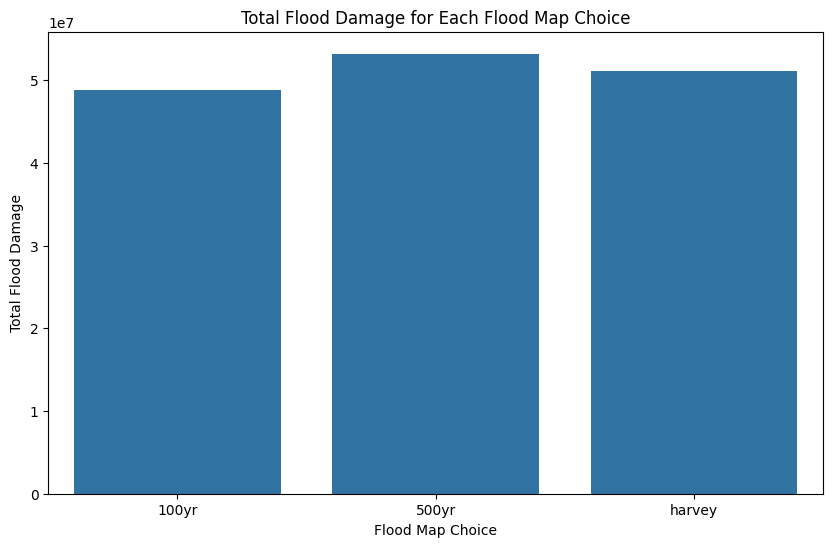

In [24]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='flood_map_choice', y='FloodDamageActual', data=step_sum)

# Add labels and title
plt.xlabel('Flood Map Choice')
plt.ylabel('Total Flood Damage')
plt.title('Total Flood Damage for Each Flood Map Choice')

# Show the plot
plt.show()